In [6]:
from colors import cmap, heterocycles_colors
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
from pathlib import Path
import numpy as np

In [4]:
df = pd.read_csv(".temp/data/compas-2x.csv", index_col=0).query('charge == 0')

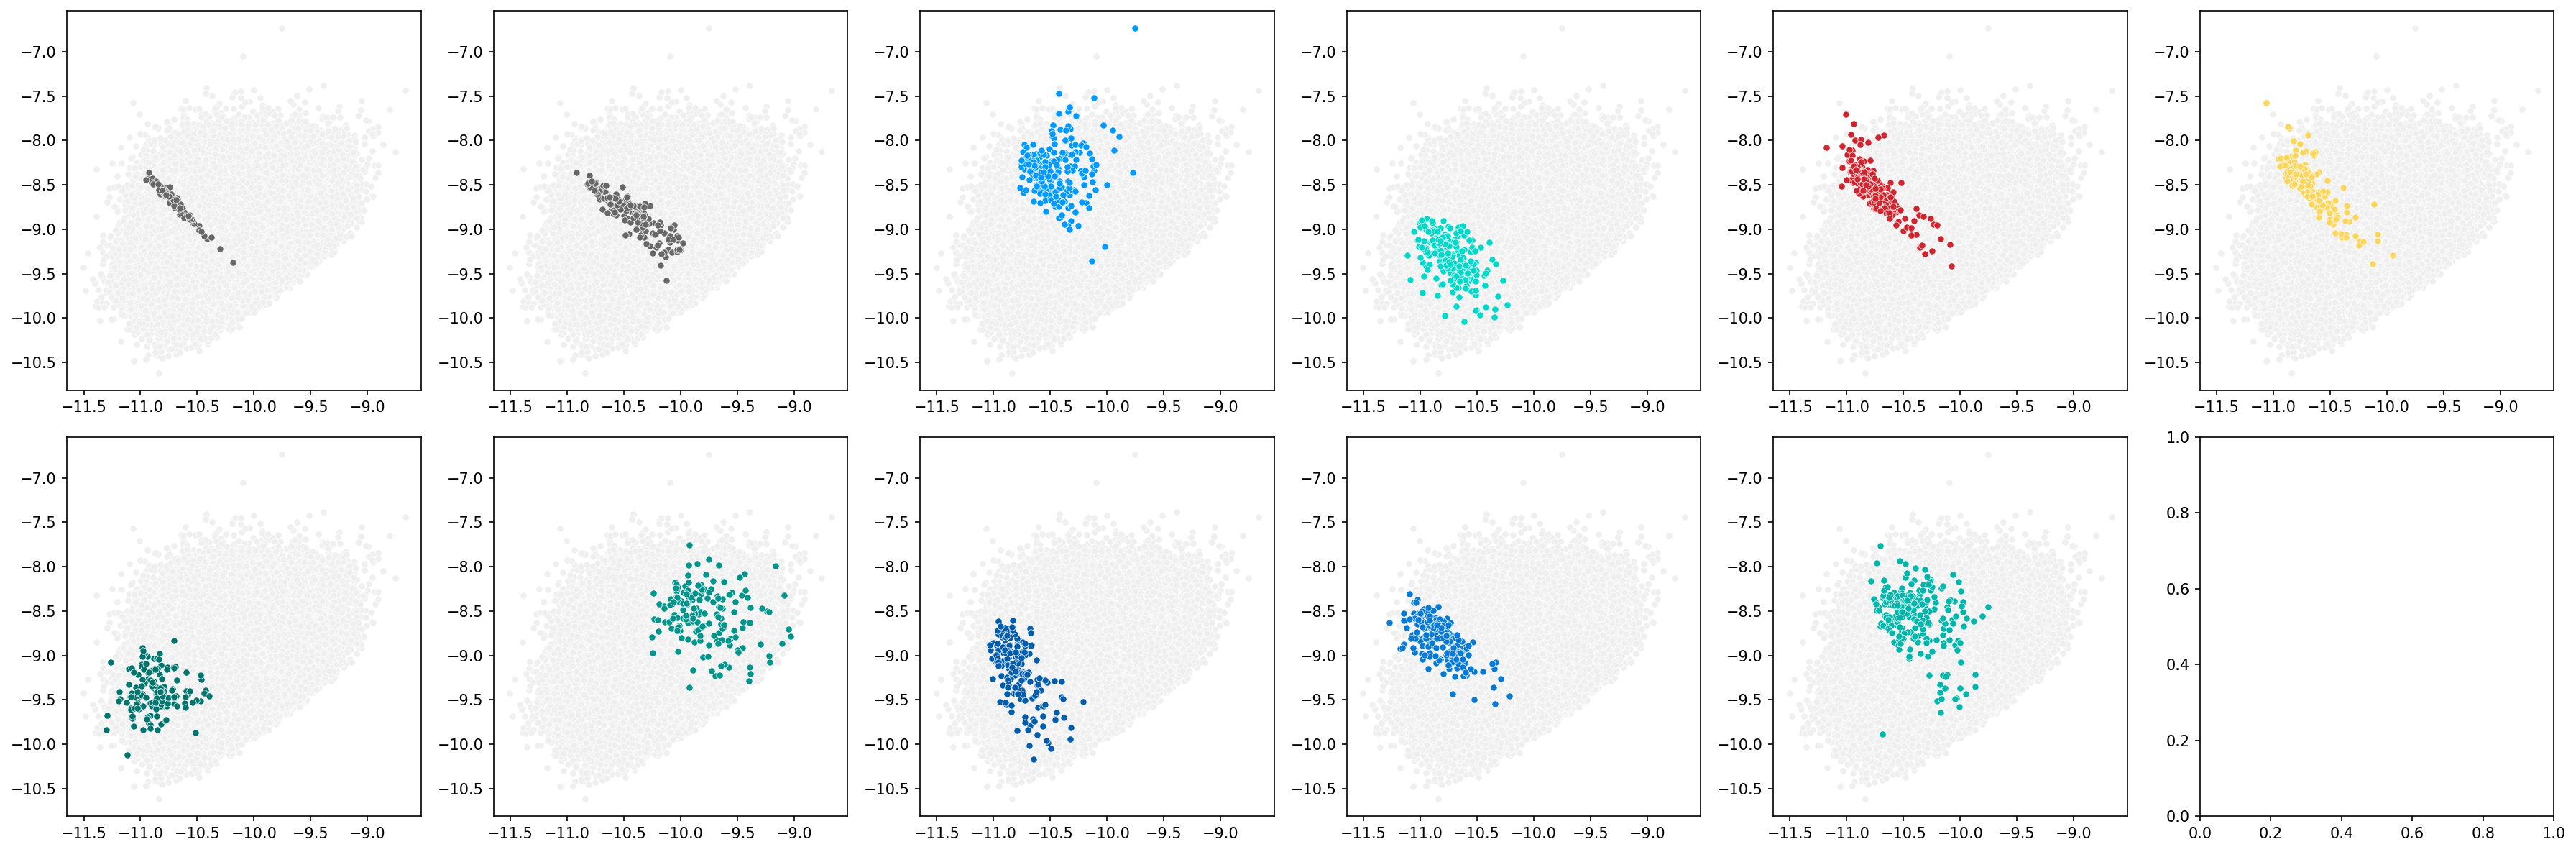

In [7]:

def get_query(bblock):
    query = "benzene != 0 "
    for ring in heterocycles_colors.keys():
        if ring == "benzene": continue
        if ring == bblock: 
            query += f"& `{ring}` != 0 "
            continue
        query += f"& `{ring}` == 0 "
    return query

df = df.sample(50000)
# make a grid plot for each properties n_cols = 6, infer n_rows
n_cols = 6
n_rows = int(np.ceil(len(heterocycles_colors) / n_cols))

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(4 * n_cols, 4 * n_rows), dpi=150,)
axes = axes.flatten()

for i, (ring, color) in enumerate(heterocycles_colors.items()):
    sns.scatterplot(data=df,
                    x='homo',y='lumo',s=20,color="#EFEFEF",ax=axes[i] )
    sns.scatterplot(data=df.query(get_query(ring)),
                    x='homo',y='lumo',s=20,color=color,ax=axes[i] )
    # remove axis 
    # axes[i].set_xlim([-11.5, -8.5])
    # axes[i].set_ylim([-10.5, -7.5])
    # set sqaure aspect
    # axes[i].set_aspect('equal')
    # set axis off
    # axes[i].set_axis_off()
    # hide x and y labels
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
plt.tight_layout()